In [1]:
import pandas as pd
import os
import numpy as np
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# path of training data
train_path = 'train.xlsx'

# path of testing data
test_path = 'test.xlsx'

In [4]:
# show the first 5 rows of the training data
train_df = pd.read_excel(train_path)
print(train_df.head())

# show the first 5 rows of the testing data
test_df = pd.read_excel(test_path)
print(test_df.head())

                                              report class_name  class_index
0  "For any event on my bookmarked projects" opti...    Backend            1
1           Switch to using full l10n id's in urlbar   Frontend            2
2  Consider removing hasicon property to simplify...   Frontend            2
3  Method to obtain current URL from WebBrowserEd...   Frontend            2
4              Fix: migration fails in MS SQL-Server    Backend            1
                                              report class_name  class_index
0  REST API - ability to list sub projects for a ...    Backend            1
1  support selective text on right if set in GNOM...   Frontend            2
2  [meta][userstory] Ship v1 of Pre-populated top...   Frontend            2
3  Include updated_on and passwd_changed_on colum...    Backend            1
4    Problem with email integration to MS Office 365    Backend            1


In [5]:
def convert_lower_case(data):
    return str(data).lower()

In [6]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        data = np.char.replace(data, i, ' ')

    return str(data)


In [7]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [8]:
def remove_numbers(data):
    return re.sub(r'\d+', '', str(data))

In [9]:
def remove_single_characters(tokens):
    new_text = ""
    for w in tokens:
        if len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [10]:
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(data)
    data = remove_single_characters(tokens)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return lemmatized_output

In [11]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data)
    data = remove_apostrophe(data)
    data = remove_numbers(data)
    data = lemmatization(data)
    return data

In [12]:
# print the first report of the training data
print(train_df['report'][0])


"For any event on my bookmarked projects" option not sending notifications for non-member bookmarked projects


In [13]:
# preprocess the first report of the training data
print(preprocess(train_df['report'][0]))


for any event on my bookmarked project option not sending notification for non member bookmarked project


In [14]:
import pandas as pd

# Assuming train_df is your DataFrame containing training data
# Assuming train_df has columns 'id', 'report', and 'class_name'

# Initialize counter
counter = 1

# Iterate over each row in the DataFrame
with open('preprocessed_train_data.csv', 'w', encoding='utf-8') as f:
    f.write('bug_description , class_name\n')  # Write header

    for _, row in train_df.iterrows():
        # Preprocess the 'report' column
        preprocessed_report = preprocess(row['report'])

        # Write data to the file with incremented counter
        f.write(f"{preprocessed_report},{row['class_name']}\n")

# Print the first preprocessed report
print(train_df['report'][0])


"For any event on my bookmarked projects" option not sending notifications for non-member bookmarked projects


In [15]:
# FOR TESTING DATA

# Iterate over each row in the DataFrame
with open('preprocessed_test_data.csv', 'w', encoding='utf-8') as f:
    f.write('bug_description , class_name\n')  # Write header

    for _, row in test_df.iterrows():
        # Preprocess the 'report' column
        preprocessed_report = preprocess(row['report'])

        # Write data to the file with incremented counter
        f.write(f"{preprocessed_report},{row['class_name']}\n")

# Print the first preprocessed report
print(test_df['report'][0])


REST API - ability to list sub projects for a project


In [16]:
# Open the preprocessed data file for reading
with open('preprocessed_train_data.csv', 'r', encoding='utf-8') as f:
    # Open the new file for writing preprocessed data with 2 columns
    with open('preprocessed_train_data2.csv', 'w', encoding='utf-8') as f_out:
        # Iterate over each line in the file
        for i, line in enumerate(f):
            # Skip the header
            if i == 0:
                continue
            
            # Split the line into columns based on comma delimiter
            columns = line.strip().split(',')
            
            # Check the number of columns
            if len(columns) == 2:
                # Get the preprocessed report and class name
                preprocessed_report = columns[0]
                class_name = columns[1]
                
                # Write the preprocessed report and class name to the new file
                f_out.write(f"{preprocessed_report},{class_name}\n")
            else:
                # Skip the line if it doesn't have exactly 2 columns
                continue


In [17]:
# FOR TESTING DATA

# Open the preprocessed data file for reading
with open('preprocessed_test_data.csv', 'r', encoding='utf-8') as f:
    # Open the new file for writing preprocessed data with 2 columns
    with open('preprocessed_test_data2.csv', 'w', encoding='utf-8') as f_out:
        # Iterate over each line in the file
        for i, line in enumerate(f):
            # Skip the header
            if i == 0:
                continue
            
            # Split the line into columns based on comma delimiter
            columns = line.strip().split(',')
            
            # Check the number of columns
            if len(columns) == 2:
                # Get the preprocessed report and class name
                preprocessed_report = columns[0]
                class_name = columns[1]
                
                # Write the preprocessed report and class name to the new file
                f_out.write(f"{preprocessed_report},{class_name}\n")
            else:
                # Skip the line if it doesn't have exactly 2 columns
                continue


In [30]:
# read the preprocessed data from the new file
preprocessed_train_df = pd.read_csv('preprocessed_train_data2.csv')

# show the first 5 rows of the preprocessed training data
print(preprocessed_train_df.head())

                                     bug_description class_name
0  for any event on my bookmarked project option ...    Backend
1               switch to using full ln id in urlbar   Frontend
2  consider removing hasicon property to simplify...   Frontend
3  method to obtain current url from webbrowsered...   Frontend
4                fix migration fails in m sql server    Backend


In [67]:
# read the preprocessed data from the new file
preprocessed_test_df = pd.read_csv('preprocessed_test_data2.csv')

# show the first 5 rows of the preprocessed training data
print(preprocessed_test_df.head())

                                     bug_description class_name
0  rest api ability to list sub project for a pro...    Backend
1  support selective text on right if set in gnom...   Frontend
2  meta userstory ship v of pre populated topsite...   Frontend
3  include updated on and passwd changed on colum...    Backend
4         problem with email integration to m office    Backend


## Feature Exraction

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN values with an empty string
preprocessed_train_df['bug_description'].fillna('', inplace=True)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed data
X_train = vectorizer.fit_transform(preprocessed_train_df['bug_description'])

# Print the shape of the transformed data
print(X_train.shape)


(13866, 7663)


In [ ]:
# print the vector representation of the first report
print(X_train[0])

  (0, 3991)	0.2538660078657135
  (0, 4326)	0.22188781122260037
  (0, 4360)	0.16200943672815057
  (0, 5896)	0.26840990743892756
  (0, 4344)	0.12359962887671232
  (0, 4562)	0.18653498271477986
  (0, 5087)	0.3360730020928219
  (0, 692)	0.6032988290912195
  (0, 4234)	0.2431528345726809
  (0, 4482)	0.13533242661691539
  (0, 2189)	0.24482610182777964
  (0, 299)	0.25719129168101634
  (0, 2527)	0.2398225552777558


In [43]:
# Print the number of unique class_name in the training data
print(preprocessed_train_df['class_name'].nunique())

# print their unique values
print(preprocessed_train_df['class_name'].unique())

# print the number of reports in each class
print(preprocessed_train_df['class_name'].value_counts())



5
['Backend' 'Frontend' 'Security' 'Documentation' 'Performance']
Backend          7437
Frontend         5799
Security          367
Documentation     174
Performance        89
Name: class_name, dtype: int64


In [42]:
# know we need to apply k-means clustering to the data so that we can group similar reports together
from sklearn.cluster import KMeans

# The clusters are: ['Backend' 'Frontend' 'Security' 'Documentation' 'Performance']
# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the data
kmeans.fit(X_train)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels)

# Add the cluster labels to the preprocessed data
preprocessed_train_df['cluster'] = labels

# Print the first 5 rows of the preprocessed data
print(preprocessed_train_df.head())

# Print the number of reports in each cluster
print(preprocessed_train_df['cluster'].value_counts())

# Print the number of reports in each class_name
print(preprocessed_train_df['class_name'].value_counts())


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]
                                     bug_description class_name  cluster
0  for any event on my bookmarked project option ...    Backend        1
1               switch to using full ln id in urlbar   Frontend        1
2  consider removing hasicon property to simplify...   Frontend        1
3  method to obtain current url from webbrowsered...   Frontend        1
4                fix migration fails in m sql server    Backend        1
1    8111
2    2085
0    1975
4     866
3     829
Name: cluster, dtype: int64
Backend          7437
Frontend         5799
Security          367
Documentation     174
Performance        89
Name: class_name, dtype: int64


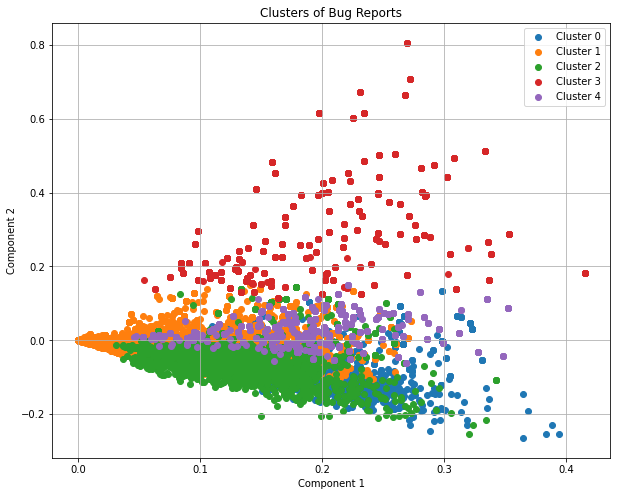

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for plotting
X_svd = svd.fit_transform(X_train)

# Plot the clusters
plt.figure(figsize=(10, 8))

# Iterate over each cluster
for cluster_label in range(5):  # Assuming 5 clusters
    # Get indices of reports belonging to the current cluster
    cluster_indices = preprocessed_train_df[preprocessed_train_df['cluster'] == cluster_label].index
    
    # Plot reports in the current cluster
    plt.scatter(X_svd[cluster_indices, 0], X_svd[cluster_indices, 1], label=f'Cluster {cluster_label}')

plt.title('Clusters of Bug Reports')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


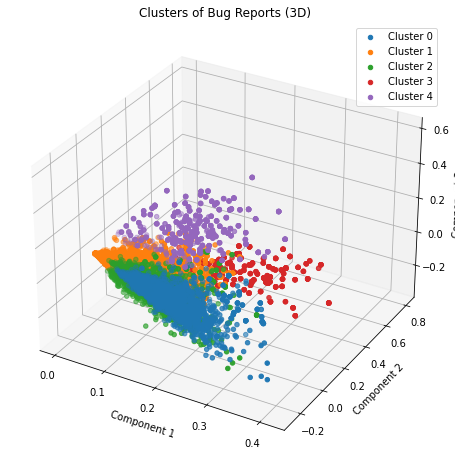

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D module
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=3)  # Reduce to 3 dimensions for plotting
X_svd = svd.fit_transform(X_train)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each cluster
for cluster_label in range(5):  # Assuming 5 clusters
    # Get indices of reports belonging to the current cluster
    cluster_indices = preprocessed_train_df[preprocessed_train_df['cluster'] == cluster_label].index
    
    # Plot reports in the current cluster
    ax.scatter(X_svd[cluster_indices, 0], X_svd[cluster_indices, 1], X_svd[cluster_indices, 2], label=f'Cluster {cluster_label}')

ax.set_title('Clusters of Bug Reports (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.show()


In [51]:
import plotly.graph_objs as go
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality using TruncatedSVD
# svd ==> stands for Singular Value Decomposition
svd = TruncatedSVD(n_components=3)  # Reduce to 3 dimensions for plotting
X_svd = svd.fit_transform(X_train)

# Create traces for each cluster
traces = []
for cluster_label in range(5):  # Assuming 5 clusters
    # Get indices of reports belonging to the current cluster
    cluster_indices = preprocessed_train_df[preprocessed_train_df['cluster'] == cluster_label].index
    
    # Create trace for the current cluster
    trace = go.Scatter3d(
        x=X_svd[cluster_indices, 0],
        y=X_svd[cluster_indices, 1],
        z=X_svd[cluster_indices, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8,
        ),
        name=f'Cluster {cluster_label}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Clusters of Bug Reports (3D)',
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3'),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show interactive plot
fig.show()


In [70]:
# try to predict the class_name of the testing data using the trained model

# Replace NaN values with an empty string
preprocessed_test_df['bug_description'].fillna('', inplace=True)

# Transform the preprocessed test data
X_test = vectorizer.transform(preprocessed_test_df['bug_description'])

# Predict the cluster labels for the test data
test_labels = kmeans.predict(X_test)

# Add the cluster labels to the preprocessed test data
preprocessed_test_df['cluster'] = test_labels

# Print the first 5 rows of the preprocessed test data
print(preprocessed_test_df.head())

# calculate the confusion matrix and accuracy, ,precision, recall, and F1-score of the model
from sklearn.metrics import confusion_matrix, classification_report

# Create a mapping between cluster labels and class names
cluster_class_mapping = {
    0: 'Backend',  # Example mapping, adjust based on your actual clusters
    1: 'Frontend',
    2: 'Security',
    3: 'Documentation',
    4: 'Performance'
}

# Map cluster labels to class names for the test data
predicted_class_names = preprocessed_test_df['cluster'].map(cluster_class_mapping)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(preprocessed_test_df['class_name'], predicted_class_names)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(preprocessed_test_df['class_name'], predicted_class_names)

# Print the classification report
print("\nClassification Report:")
print(class_report)


                                     bug_description class_name  cluster
0  rest api ability to list sub project for a pro...    Backend        4
1  support selective text on right if set in gnom...   Frontend        1
2  meta userstory ship v of pre populated topsite...   Frontend        1
3  include updated on and passwd changed on colum...    Backend        4
4         problem with email integration to m office    Backend        3
Confusion Matrix:
[[122 142 799 153 129]
 [  1   0  17   3   0]
 [207   0 555   8 217]
 [  0   0  18   0   0]
 [ 13   0  48   0   9]]

Classification Report:
               precision    recall  f1-score   support

      Backend       0.36      0.09      0.14      1345
Documentation       0.00      0.00      0.00        21
     Frontend       0.39      0.56      0.46       987
  Performance       0.00      0.00      0.00        18
     Security       0.03      0.13      0.04        70

     accuracy                           0.28      2441
    macro avg    